In [15]:
#!pip install chart_studio

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [18]:
df = pd.read_csv("C:\\Users\\GOURAV NEGI\\Downloads\\Task_1_Stocks_dataset.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [20]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
print(f'DataFrame contains stock prices between {df.date.min()} {df.date.max()}')
print(f'Total days = {(df.date.max() - df.date.min()).days} days')

DataFrame contains stock prices between 2016-06-14 00:00:00+00:00 2021-06-11 00:00:00+00:00
Total days = 1823 days


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
close,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
high,1258.0,1.227431e+03,387.570872,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
low,1258.0,1.204176e+03,378.777094,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
open,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
volume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00
adjClose,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
adjHigh,1258.0,1.227431e+03,387.570873,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
adjLow,1258.0,1.204176e+03,378.777099,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
adjOpen,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
adjVolume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00


<AxesSubplot:>

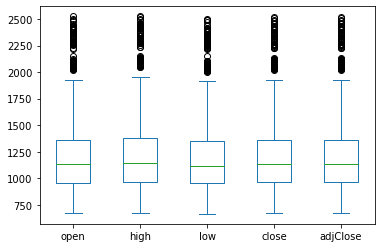

In [25]:
df[['open','high','low','close','adjClose']].plot(kind='box')

In [36]:
# Setting the Layout for our plot
layout = go.Layout(
    title = 'Stock price prediction',
    xaxis = dict(
        title = 'Date',
        titlefont = dict(
            family = 'Courier New, monospace',
            size = 18,
            color ='#7f7f7f'
        )
    ),
    yaxis = dict (
        title = 'Price',
        titlefont = dict(
            family = 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    )
)

df_data = [{'x':df['date'],'y':df['close']}]
plot = go.Figure(data = df_data, layout=layout)

In [37]:
#plot(plot) # plotting offlie
iplot(plot)

In [39]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [41]:
#Split teh data into train and test sets
X = np.array(df.index).reshape(-1,1)
Y = df['close']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 101)


In [44]:
#Feature scaling
scaler = StandardScaler().fit(X_train)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
#Creating a Linear model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [53]:
#plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
df_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plto2 = go.Figure(data = df_data,layout=layout)

In [55]:
iplot(plto2)

In [58]:
print(scores)


metric           Train                Test        
r2_score  0.7816356739384045	0.8085902295141348
MSE       32790.55511796628	26360.52498437492



In [8]:
df = df.drop(['date','symbol','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis = 1)
df.head()

,close,high,low,open,volume
0,718.27,722.47,713.1200,716.48,1306065
1,718.92,722.98,717.3100,719.00,1214517
2,710.36,716.65,703.2600,714.91,1982471
3,691.72,708.82,688.4515,708.65,3402357
4,693.71,702.48,693.4100,698.77,2082538


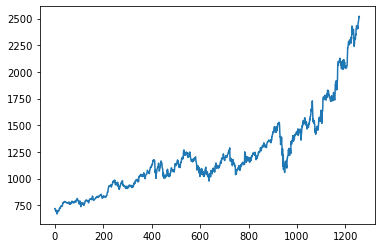

In [10]:
plt.plot(df.close);